<a href="https://colab.research.google.com/github/gauriagarwal18/AMAZON-FINE-FOOD-REVIEWS/blob/master/amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **AMAZON FINE FOOD REVIEWS**

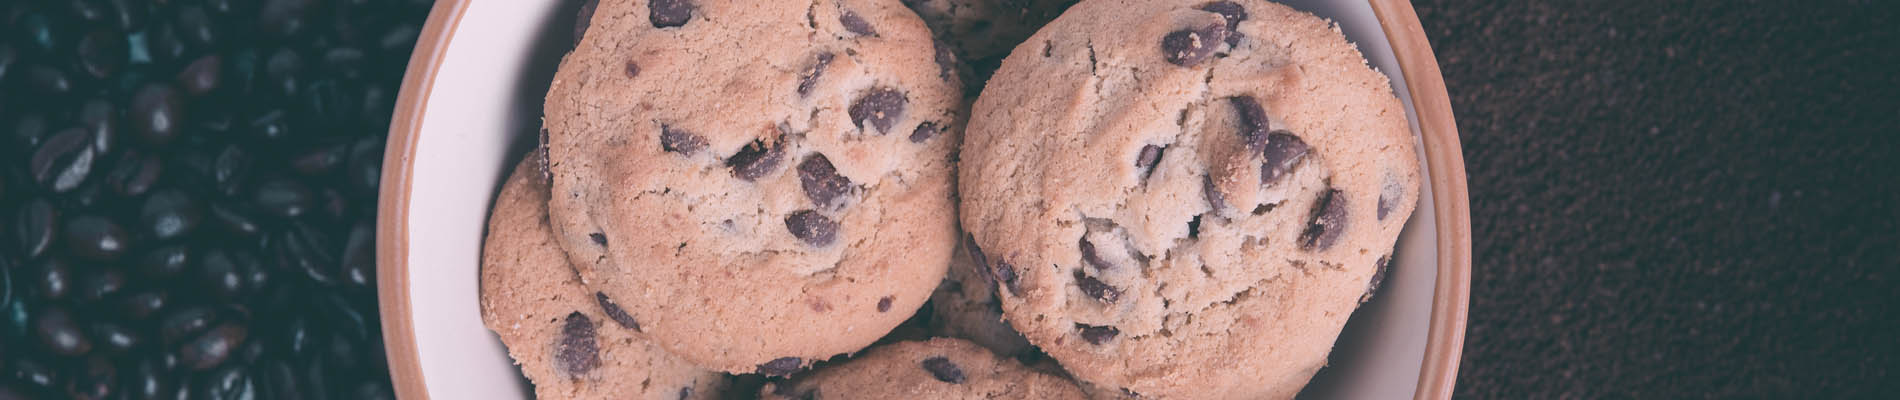

#INTRODUCTION
This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.




Referrence: Kaggle


##Libraries and modules required for this project:


In [ ]:
!pip install lxml
!pip install -q kaggle
import os
from zipfile import ZipFile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive/')

from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import string
nltk.download('all')

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

from bs4 import BeautifulSoup
import re



shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main.py", line 10, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/build_env.py", line 19, in <module>
    from pip._internal.cli.spi

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

##Reading data set from kaggle

In [ ]:
os.chdir("/content/drive/MyDrive/Data_Analysis_Projects/nlp_amazon")
#os.environ['KAGGLE_CONFIG_DIR']="/content/drive/MyDrive/Data_Analysis_Projects/nlp_amazon"


In [ ]:
%cd "/content/drive/MyDrive/Data_Analysis_Projects/nlp_amazon"

/content


In [ ]:
! kaggle datasets download -d snap/amazon-fine-food-reviews

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
with ZipFile('/content/drive/MyDrive/Data_Analysis_Projects/nlp_amazon/amazon-fine-food-reviews.zip','r') as zipObj:
  zipObj.extractall('/content/drive/MyDrive/Data_Analysis_Projects/nlp_amazon')

In [ ]:
reviews=(pd.read_csv('/content/drive/MyDrive/Data_Analysis_Projects/nlp_amazon/Reviews.csv'))
reviews_original=pd.read_csv('/content/drive/MyDrive/Data_Analysis_Projects/nlp_amazon/Reviews.csv')

In [ ]:
reviews.shape

(568454, 10)

##About Data Set:


In [ ]:
reviews.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

**Description of columns:**

Data includes:

- Reviews from Oct 1999 - Oct 2012
- 568,454 reviews
- 256,059 users
- 74,258 products
- 260 users with > 50 reviews

In total there are 10 columns:
- **Id:** It is a unique id for every review
- **ProductId:** Id of the product for which the review is recorded
- **UserId:** Id of user giving the review
- **ProfileName**: Name of the profile from which review is made.
- **HelpfulnessNumerator:** Number of users who found the revie helpful
- **HelpfulnessDenominator:** Numbern of users who indicate whether the review is helpful or not.
- **Score:** rating between 1 and 5
- **Time:** timestamp of the review
- **Summary:** A short summary of the review
- **Text:** The review written by the customer

Each review represents a row here.

In [ ]:
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
reviews.shape

(568454, 10)

In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


**Inferrence:** From here we note that data have 5 integer columns and 5 text based columns. There are total 568454 rows, and two columns- ProfileName and summary consists of some null values.

In [ ]:
reviews.describe()  #description of numerical features

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


**Inference:**

HelpfulnessNumerator: nearly 75% of the values are less than or equal to 2, that means there are only some review which  peoples find helpful and other are common or simple reviews. Similar observation we can make for HelpfulnessDenominator.

Score is having integer values from 1 to 5 where 1,2 showss negative rating for a product, 3 means average and 4,5 means that the product is good.



In [ ]:
reviews.describe(include=object)  #description of text based features or features with string data type

,ProductId,UserId,ProfileName,Summary,Text
count,568454,568454,568438,568427,568454
unique,74258,256059,218416,295742,393579
top,B007JFMH8M,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",Delicious!,"This review will make me sound really stupid, ..."
freq,913,448,451,2462,199


**Inference:**  
**count** shows the total number of not null values, **unique** shows then total number of unique values of that attribute, **top** represents the most frequently occuring value, and **freq** shows the frequency of most frequently occuring value of that attribute.

#Data Cleaning
- step1- Removing duplicate entries.
- step2- Cleaning the column  text.
- step3- Replacing null values with best possible substitute.
- Step4- Removing rows in which helpfullness numerator is greater than denominator.

In [ ]:
#shape before cleaning
reviews.shape

(568454, 10)

##Removing Duplicates

In [ ]:
reviews.drop_duplicates(inplace=True,ignore_index=True)
reviews.drop_duplicates(['UserId',"Time"],inplace=True,ignore_index=True)

In [ ]:

"""
rows with same values in columns- UserId and time are not possible as same user cannot review twice at same time slot
"""
reviews.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

##Cleaning of text column:
These are the steps or function which I performed for cleaning the text, also I tokenized the text whenever required:

- removing html tags.
- check if a word is alphanumeric
- check to see if length of any word is greater than 2(as it was researched that there is no adjective in two letters)
- removing extra spaces
- Removing Stopping Words: This is to remove the words like, ‘is’, ‘the’ etc.
- removing punctuations: This is to remove all the punctuation marks. Also to voide merging of words, I will replace punctuations with spaces, and then remove extra space.
- lemmatization: To convert different  forms of word to it’s simple
form.

Here I have also written a function to tokenize the text in words and sentences



In [ ]:
#removing html tags
remove_html_tags=lambda txt:(BeautifulSoup(txt, "lxml").text )

In [ ]:
#check if a word is alphanumeric or not for this project only english word are important so  I will remove all the numeric and special char
retain_alpha=lambda txt:("".join([ch for ch in txt if ch.isalpha() or ch==" "]))

In [ ]:
#removing extra spaces from text
remove_extra_spaces=lambda text:(" ".join((text.strip()).split()))

In [ ]:
#to check length of each word of a string and if the length is less than three than remove than word
def check_length(text):
  if(isinstance(text,str)):
    text_words=text.split()
  else:
    text_words=text.copy()

  text_words=[word for word in text_words if len(word)>=3 ]

  if(isinstance(text,str)):
    text=" ".join(text_words)
    return text
  return text_words


In [ ]:
#this is the list of all stop words
lst_stop=list(stopwords.words('english'))
print(lst_stop)
print(len(lst_stop))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
words_to_keep=['against','between','again','once','all','more','most','some','no','nor','not','only']

In [ ]:
"""
now there are some words in stop words which are important and they must not be removed:
for ex:

text1- This item is tasty
text2- This item is not tasty
then after removing not(as it is a stoping word) both these sentence will have the same meaning, but in reality
they are just opposite so in order to avoide this I will exclude list of some words from stop words.
"""

'\nnow there are some words in stop words which are important and they must not be removed:\nfor ex:\n\ntext1- This item is tasty\ntext2- This item is not tasty\nthen after removing not(as it is a stoping word) both these sentence will have the same meaning, but in reality\nthey are just opposite so in order to avoide this I will exclude list of some words from stop words.\n'

In [ ]:
#A function for removing stopping words from the text
def remove_stopping_words(text):

  words_to_keep=['against','between','again','once','all','more','most','some','no','nor','not','only']

  sw_all=(set(stopwords.words('english')))
  sw={i for i in sw_all if i not in words_to_keep}

  if(isinstance(text,str)):
    text_words=text.split()
  else:
    text_words=text.copy()

  text_words=[word for word in text_words if word not in sw ]

  if(isinstance(text,str)):
    text=" ".join(text_words)
    return text
  return text_words




In [ ]:
#A function for removing puntuations
def remove_punctuations(text):

  #i want to preserve only alphabets and numbers
  alpha_num=list(string. ascii_lowercase)
  alpha_num.extend(string. ascii_uppercase)
  alpha_num.extend([str(x) for x in list(range(0,10))])


  #i will also prserve full stop and spaces, to marks the end of sentences and words respectively
  alpha_num.extend(['.'," "])
  is_text=True

  if(isinstance(text,list)):
    t=" ".join(text)
    is_text=False
  else:
    t=text

  #punctuations will be replaced with spaces
  t=[letter if letter in alpha_num else ' ' for letter in t]
  t="".join(t)
  t=remove_extra_spaces(t)

  if(is_text==False):
    t=t.split()
  return t

In [ ]:
#code for lemmatization: this to treat all the similar kind of words as a same word

def lemmatisation_text(text):

  lemmatizer = WordNetLemmatizer()

  if(isinstance(text,str)):
    text_words=text.split()
  else:
    text_words=text.copy()

  #this will change plural to singular
  text_words=[lemmatizer.lemmatize(word) for word in text_words]

  #bring all the verbs to their present tense
  text_words=[lemmatizer.lemmatize(word, pos="v") for word in text_words]

  if(isinstance(text,str)):
    text=" ".join(text_words)
    return text


  return text_words

In [ ]:
def remove_fullstop(text):
  if(isinstance(text,list)):
    t=" ".join(text)
  else:
    t=text

  #. will be replaced with spaces
  t=t.replace('.',' ')
  t=remove_extra_spaces(t)

  if(isinstance(text,list)):
    t=t.split()
  return t


In [ ]:
#Tokenization
tokenize_words=lambda text:(word_tokenize(text))
tokenize_sentences=lambda text:(sent_tokenize(text))

In [ ]:
def cleaning_of_text(text):
  text=remove_extra_spaces(text)
  text=remove_stopping_words(text)
  text=remove_punctuations(text)
  text=remove_fullstop(text)
  text=lemmatisation_text(text)
  text=remove_html_tags(text)
  text=retain_alpha(text)
  text=check_length(text)
  text=" ".join(tokenize_words(text))
  text=text.lower()
  return text



In [ ]:
reviews["Text"]=[cleaning_of_text(x) for x in reviews["Text"]]

In [ ]:
reviews['Summary'].fillna("",inplace=True)
reviews["Summary"]=[cleaning_of_text(x) for x in reviews["Summary"]]

##Removing null values

In [ ]:
reviews.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [ ]:
#null values are present in columns profileName and summary column,
#so for summary we will choose the most frequently occuring 3(depending on average number of words in summary column) words in text column.
#for ProfileName we will replace the value with most frequntly occuring profile name.

###Removing null values from summary column-


In [ ]:
summary_wc=[len(x.split(" ")) for x in reviews["Summary"].values ]
summary_wc_mean=(sum(summary_wc)//len(summary_wc))
summary_wc_mean

3

In [ ]:
"""
it is a function to fill a best fitted summary in place of empty string
"""

def fill_summary(df, n):
  summary=list(reviews["Summary"])
  l=len(summary)
  new_sum=[]
  for s in range(0,l):
    if(summary[s]!=""):
      new_sum.append(summary[s])
    else:
      txt=" ".join(list((pd.Series((reviews['Text'][s]).split(" "))).value_counts().index)[0:n])
      new_sum.append(txt)
  return new_sum



In [ ]:
reviews["Summary"]=fill_summary(reviews, summary_wc_mean)   # to write a summary where summary is a empty string

###Removing null values from ProfileName column

In [ ]:
def print_null_percent(df):
  null_percent=pd.Series()
  for col in df.columns:
    null_percent[col]=((df.shape[0]-df[col].count())/(df.shape[0]))*100
  print("columns with null values\n",null_percent[null_percent!=0])


In [ ]:

def cleaning(df,continuous_col=[],discrete_col=[],print_null=True,th=20.0):
  """
  this function removes all the null values from the data
  """

  print(f"before cleaning\n")
  print(f"shape of data: {df.shape}")
  if(print_null):
    print_null_percent(df)

  #step1
  #preserving columns having at least 20% of not null values
  df.dropna(axis=1,inplace=True,thresh=((th/100.0)*df.shape[0]))
  #preserving rows having at least 20% of not null values
  df.dropna(axis=0,inplace=True,thresh=((th/100.0)*df.shape[1]))

  #step2
  df.drop_duplicates(inplace=True,ignore_index=True)


  #step3
  #removing all the null values
  for c1 in df.columns:

    #i.e it is an non catagorical column
    if c1 in continuous_col:
      df[c1].fillna(df[c1].mean(),inplace=True)
    else:
      df[c1].fillna(df[c1].value_counts().idxmax(),inplace=True)

  print(f"\n\nAfter cleaning the data\n")
  print(f"shape of data: {df.shape}")
  print_null_percent(df)
  return df

In [ ]:
reviews=cleaning(reviews,discrete_col=['ProfileName'],print_null=False)

before cleaning

shape of data: (352744, 10)


After cleaning the data

shape of data: (352744, 10)
columns with null values
 Series([], dtype: float64)


<ipython-input-281-530123f6daa5>:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  null_percent=pd.Series()


##Step4

In [ ]:
#helpfullness numerator<=helpfullness denominator.
reviews.where(reviews["HelpfulnessNumerator"]<=reviews["HelpfulnessDenominator"],np.nan,inplace=True)

In [ ]:
reviews.dropna(inplace=True)

In [ ]:
#shape after cleaning
reviews.shape

(352742, 10)

#Ojective:

Given a Review, determine whether the review is positive(4,5 rating) or negative(1,2 rating). Score of 3 do not give any clear indication, so we will remove the rows with score 3

Benefit of finding positive and negaitive reviews: looking at negative reviews a product can be improved, and using positive reviews we can retain those features which are appreciated by customers.

- I will remove the score column and replace it with the column which shows whether a review is positive or negative. Now My final objective will be to find out whether a given review is positive or negative using supervised machine learning classification problem

In [ ]:
reviews["Score"]=list(np.where(reviews["Score"]==3,np.nan,reviews["Score"]))
reviews.dropna(inplace=True)
#let 0 signify negative and 1 signify positive review
reviews["Score"]=list(np.where(reviews["Score"]<3,0,1))

In [ ]:
#final data_set
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1.0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,1,1.303862e+09,good quality dog food,buy several vitality can dog food product find...
1,2.0,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,0,1.346976e+09,not advertised,product arrive label jumbo salted peanuts the ...
2,3.0,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,1,1.219018e+09,delight say all,this confection around century light pillowy c...
3,4.0,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,0,1.307923e+09,cough medicine,look secret ingredient robitussin believe find...
4,5.0,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,1,1.350778e+09,great taffy,great taffy great price there wide assortment ...


#Featur Engineering

- Step1- Replace two columns- ['HelpfulnessNumerator','HelpfulnessDenominator'] by a single column-
 ['HelpfulnessRatio'='HelpfulnessNumerator'/'HelpfulnessDenominator'].

- Step2- Dropping all the features which are not significant- [Id, Time, ProfileName] These three features do not have any significance in analysis or for prediction so dropping these features





In [ ]:
reviews.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [ ]:
reviews["HelpfulnessRatio"]=reviews["HelpfulnessNumerator"]/reviews["HelpfulnessDenominator"]

In [ ]:
reviews['HelpfulnessRatio'].fillna(0, inplace=True)

In [ ]:
reviews.drop(columns=["Id","Time","ProfileName","HelpfulnessNumerator","HelpfulnessDenominator"], inplace=True)

#Sentimental Analysis
- positive score: The number of positive words in text
- negative score: The number of negative words in text
- polarity score:  This is the score that determines if a given text is positive or negative in nature, range of it's value: [-1,+1]
- subjective score: This determines whether the score is subjective or objective, it's value can range from [0,1], lesser the value lesser the content is considered to be subjective.

**for these functions text will be passed in form of tokens**

In [ ]:
#calculting positive score
def positive_score(text,positive_words):
  #text must be tokenized


  count=len([words for words in text if words in positive_words])
  return count

In [ ]:
#calculating negative score
def negative_score(text,negative_words):
  #text must be tokenized

  count=len([words for words in text if words in negative_words])
  return count

In [ ]:
# calculating polarity score
def polarity_score(text):

  ps=positive_score(text)
  ns=negative_score(text)

  if(ps!=0 or ns!=0):
    score=(ps-ns)/(ps+ns)
  else:
    print(text)
    score= np.nan #it signify that there is no positive or negative word
  return round(score,2)

In [ ]:
# calculating subjective score
def subjective_score(text):
  ps=positive_score(text)
  ns=negative_score(text)
  score=(ps+ns)/(len(text))
  return round(score,2)

In [ ]:
def analyse_sentiments(data,col):
  words=open("/content/drive/MyDrive/Data_Analysis_Projects/nlp_amazon/MasterDictionary/positive_words.txt",'r')
  positive_words=words.read()
  words.close()
  positive_words=positive_words.lower()
  positive_words=remove_extra_spaces(positive_words)
  positive_words=tokenize_words(positive_words)

  words=open("/content/drive/MyDrive/Data_Analysis_Projects/nlp_amazon/MasterDictionary/negative_words.txt",'r',encoding="ISO-8859-1")
  negative_words=words.read()
  words.close()
  negative_words=negative_words.lower()
  negative_words=remove_extra_spaces(negative_words)
  negative_words=tokenize_words(negative_words)

  positive_scores=[]
  negative_scores=[]
  for txt in data[col]:
    txt_tokens=tokenize_words(txt.lower())
    positive_scores.append(positive_score(txt_tokens,positive_words))
    negative_scores.append(negative_score(txt_tokens,negative_words))
  data["PositiveScores"]=positive_scores
  data["NegativeScores"]=negative_scores
  data["PolarityScores"]=(data["PositiveScores"])*1.0-(data["NegativeScores"])*1.0
  data["PolarityScores"].where(data["PolarityScores"]==0,(data["PolarityScores"])/(data["PositiveScores"]+data["NegativeScores"]))
  data["PolarityScores"]=[round(i,2) for i in data["PolarityScores"]]
  data["SubjectiveScores"]=((data["PositiveScores"]+data["NegativeScores"])*0.1)/((np.array([len(txt) for txt in data[col]]))*0.1)
  data["SubjectiveScores"]=[round(i,3) for i in data["SubjectiveScores"]]
  return data


In [ ]:
reviews=analyse_sentiments(reviews,"Text")

In [ ]:
reviews.dropna(inplace=True)

In [ ]:
reviews.head()

,ProductId,UserId,Score,Summary,Text,HelpfulnessRatio,PositiveScores,NegativeScores,PolarityScores,SubjectiveScores
0,B001E4KFG0,A3SGXH7AUHU8GW,1,good quality dog food,buy several vitality can dog food product find...,1.0,5,3,2.0,0.047
1,B00813GRG4,A1D87F6ZCVE5NK,0,not advertised,product arrive label jumbo salted peanuts the ...,0.0,0,1,-1.0,0.007
2,B000LQOCH0,ABXLMWJIXXAIN,1,delight say all,this confection around century light pillowy c...,1.0,2,0,2.0,0.007
3,B000UA0QIQ,A395BORC6FGVXV,0,cough medicine,look secret ingredient robitussin believe find...,1.0,1,0,1.0,0.007
4,B006K2ZZ7K,A1UQRSCLF8GW1T,1,great taffy,great taffy great price there wide assortment ...,0.0,3,0,3.0,0.034


#W2V to convert text to vector

For doing this i used two methods:
- Using 'glove-twitter-50' api.
- By creating my own W2V of same dimensions

By observing both I noticed the most similar words for some words, and concluded that first one is performing better so I selected it for vectorizing text.

In [ ]:
import gensim
from gensim.models.word2vec import Word2Vec

In [ ]:
import gensim.downloader as api
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [ ]:
#'glove-twitter-50'
glove_vector=api.load('glove-twitter-50')

In [ ]:
corpus=[txt.split(" ") for txt in list(reviews["Text"])]
corpus[0]

['buy',
 'several',
 'vitality',
 'can',
 'dog',
 'food',
 'product',
 'find',
 'all',
 'good',
 'quality',
 'the',
 'product',
 'look',
 'more',
 'like',
 'stew',
 'process',
 'meat',
 'smell',
 'better',
 'labrador',
 'finicky',
 'appreciate',
 'product',
 'better',
 'most']

In [ ]:
my_model=gensim.models.Word2Vec(corpus, min_count=5, vector_size=50, workers=4)
"""
size- dimentionality of vi
min_count: if a word occur in the corpus less then min_count number of times then w2v will not construct vector for that word.
workers- Use these many worker threads to train the model (=faster training with multicore machines).
"""

'\nsize- dimentionality of vi\nmin_count: if a word occur in the corpus less then min_count number of times then w2v will not construct vector for that word.\nworkers- Use these many worker threads to train the model (=faster training with multicore machines).\n'

In [ ]:
words=list(my_model.wv.key_to_index)
len(words)

26274

In [ ]:
my_model.wv.most_similar('tasty')

[('delicious', 0.8192212581634521),
 ('yummy', 0.7902339100837708),
 ('tastey', 0.7584145069122314),
 ('flavorful', 0.6926838159561157),
 ('good', 0.6812217831611633),
 ('nice', 0.677720844745636),
 ('versatile', 0.6594478487968445),
 ('satisfy', 0.6582950949668884),
 ('surprisingly', 0.6540766358375549),
 ('nutritious', 0.6295684576034546)]

##Fitting the text column in glove_vector

In [ ]:
def txt_vec(txt):
  vector_size=glove_vector.vector_size
  wv_res=np.zeros(vector_size)

  tokens_txt=txt.split(" ")
  ctr=1

  for w in tokens_txt :
    if w in glove_vector:
      ctr+=1
      wv_res+=glove_vector[w]
  wv_res=wv_res/ctr
  return wv_res



In [ ]:
reviews["vectors"]=reviews["Text"].apply(txt_vec)


In [ ]:
reviews.head()

,ProductId,UserId,Score,Summary,Text,HelpfulnessRatio,PositiveScores,NegativeScores,PolarityScores,SubjectiveScores,vectors
0,B001E4KFG0,A3SGXH7AUHU8GW,1,good quality dog food,buy several vitality can dog food product find...,1.0,5,3,2.0,0.047,"[-0.025515533817399825, -0.03477593906323558, ..."
1,B00813GRG4,A1D87F6ZCVE5NK,0,not advertised,product arrive label jumbo salted peanuts the ...,0.0,0,1,-1.0,0.007,"[0.009695663338615781, -0.02652659165185122, -..."
2,B000LQOCH0,ABXLMWJIXXAIN,1,delight say all,this confection around century light pillowy c...,1.0,2,0,2.0,0.007,"[-0.3500594504720842, -0.11795981855442127, 0...."
3,B000UA0QIQ,A395BORC6FGVXV,0,cough medicine,look secret ingredient robitussin believe find...,1.0,1,0,1.0,0.007,"[-0.11821118221533569, -0.12144563639197838, -..."
4,B006K2ZZ7K,A1UQRSCLF8GW1T,1,great taffy,great taffy great price there wide assortment ...,0.0,3,0,3.0,0.034,"[-0.18924600183963775, 0.09355140725771587, 0...."


#Machine learning Classification model

In [ ]:
model_scores=pd.DataFrame(columns=["model_name","accuracy_train","auc_roc_train","accuracy_test","auc_roc_test"])
scores_list=[]

In [ ]:
#reviews["vectors"]=reviews["vectors"].to_list()

In [ ]:
x=reviews["vectors"].to_list()
y=reviews["Score"].to_list()

In [ ]:
def model_checking(original,predicted,labels=["possibility1","possibility2"]):
  from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
  model_accuracy=accuracy_score(predicted,original)
  scores_list.append(model_accuracy)
  print("The accuracy of model is= ", model_accuracy,"\n")
  rocauc_score=roc_auc_score(original,predicted)
  scores_list.append(rocauc_score)
  print("The roc_auc score of model is= ", rocauc_score,"\n")
  print("Confusion matrix: \n")
  cm=confusion_matrix(original,predicted)
  print(cm)
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
  # labels, title and ticks
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [ ]:
pd.Series(y_train).value_counts()

1    219260
0     41981
dtype: int64

###Over Sampling of training data set using smote

---



Text(0.5, 1.0, 'Before using SMOTE')

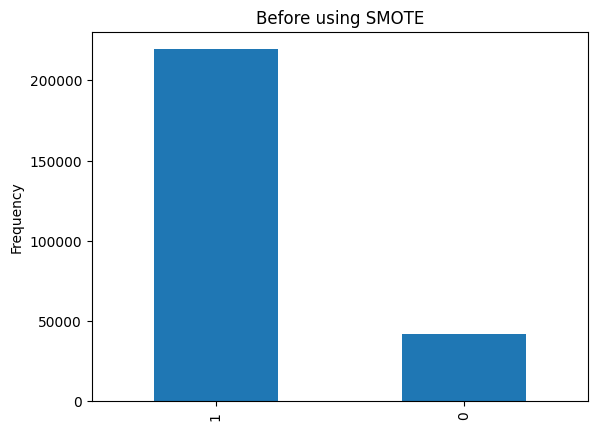

In [ ]:
pd.Series(y_train).value_counts().plot(kind = 'bar')
plt.ylabel('Frequency', fontsize = 10)
plt.title('Before using SMOTE')

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTE
smote=BorderlineSMOTE(sampling_strategy={0:(int((pd.Series(y_train).value_counts()[1])*0.80)),1:(pd.Series(y_train).value_counts()[1])})

x_train, y_train = smote.fit_resample(x_train, y_train)


Text(0.5, 1.0, 'After using SMOTE')

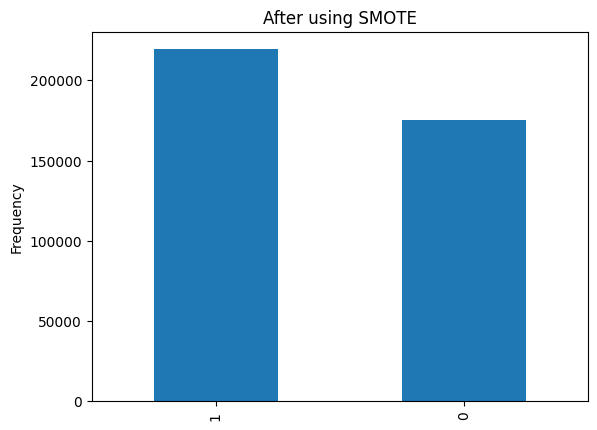

In [ ]:
pd.Series(y_train).value_counts().plot(kind = 'bar')
plt.ylabel('Frequency', fontsize = 10)
plt.title('After using SMOTE')

###Logistic regression (logistic)

Logistic regression is a statistical analysis
method to predict a binary outcome,
such as yes or no, based on prior
observations of a data set. A logistic
regression model predicts a dependent
data variable by analyzing the relationship
between one or more existing
independent variables.
The function used in Logistic Regression
is sigmoid function or the logistic
function given by:

f(x)= 1/1+e ^(-x)

In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326552 entries, 0 to 352743
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ProductId         326552 non-null  object 
 1   UserId            326552 non-null  object 
 2   Score             326552 non-null  int64  
 3   Summary           326552 non-null  object 
 4   Text              326552 non-null  object 
 5   HelpfulnessRatio  326552 non-null  float64
 6   PositiveScores    326552 non-null  int64  
 7   NegativeScores    326552 non-null  int64  
 8   PolarityScores    326552 non-null  float64
 9   SubjectiveScores  326552 non-null  float64
 10  vectors           326552 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 29.9+ MB


In [ ]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression(fit_intercept=True, max_iter=10000)
logistic.fit(x_train,y_train)
scores_list=["logistic_regression"]

In [ ]:
train_predict=logistic.predict_proba(x_train)[:,1]
test_predict=logistic.predict_proba(x_test)[:,1]

In [ ]:
train_predicted=logistic.predict(x_train)
test_predicted=logistic.predict(x_test)

The accuracy of model is=  0.7818115479339597 

The roc_auc score of model is=  0.7797922557694061 

Confusion matrix: 

[[133594  41814]
 [ 44298 174962]]


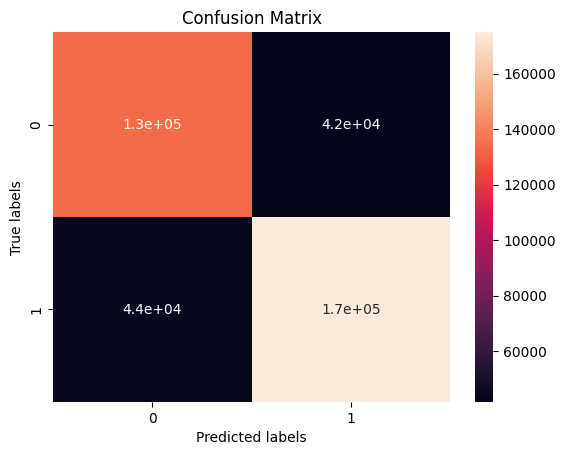

In [ ]:
model_checking(y_train, train_predicted,labels=["0","1"])

The accuracy of model is=  0.788106138322794 

The roc_auc score of model is=  0.7653733067536149 

Confusion matrix: 

[[ 7832  2874]
 [10965 43640]]


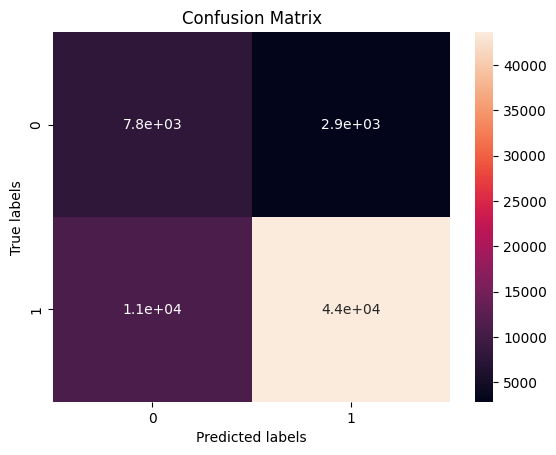

In [ ]:
model_checking(y_test, test_predicted,labels=["0","1"])

In [ ]:
model_scores=model_scores.append(dict(zip(list(model_scores.columns),scores_list)), ignore_index=True)

<ipython-input-327-81a58b05984b>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_scores=model_scores.append(dict(zip(list(model_scores.columns),scores_list)), ignore_index=True)


###Decesion Tree

A decision tree is a very specific type of
probability tree that enables you to make
a decision about some kind of process, it
is a flowchart-like structure in which each
internal node represents a "test" on an
attribute, each branch represents the
outcome of the test, and each leaf node
represents a class label (decision taken
after computing all attributes)

Simple Model (dtree)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#fitting on train data
dtree=DecisionTreeClassifier(criterion="entropy",random_state=0)
dtree.fit(x_train,y_train)
scores_list=["Decision_Tree"]

In [ ]:
test_predicted=dtree.predict(x_test)
train_predicted=dtree.predict(x_train)

The accuracy of model is=  0.9999923986743288 

The roc_auc score of model is=  0.9999925887074707 

Confusion matrix: 

[[175407      1]
 [     2 219258]]


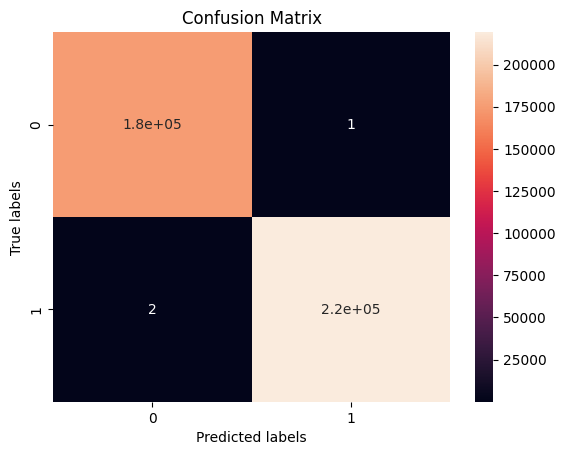

In [ ]:
model_checking(y_train, train_predicted,labels=["0","1"])

The accuracy of model is=  0.7422792485186263 

The roc_auc score of model is=  0.6458292306072004 

Confusion matrix: 

[[ 5378  5328]
 [11504 43101]]


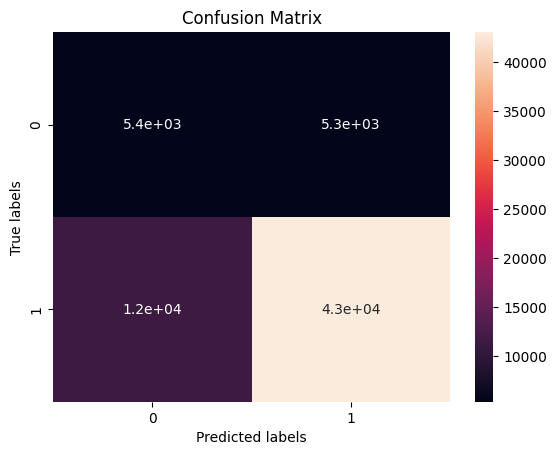

In [ ]:
model_checking(y_test, test_predicted,labels=["0","1"])

In [ ]:
model_scores=model_scores.append(dict(zip(list(model_scores.columns),scores_list)), ignore_index=True)

<ipython-input-333-81a58b05984b>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_scores=model_scores.append(dict(zip(list(model_scores.columns),scores_list)), ignore_index=True)


###Gradient boosting

Gradient boosting is a type of machine
learning boosting. It relies on the
intuition that the best possible next
model, when combined with previous
models, minimizes the overall prediction
error. The key idea is to set the target
outcomes for this next model in order to
minimize the error. This estimator builds
an additive model in a forward stage-wise
fashion; it allows for the optimization of
arbitrary differentiable loss functions.
Keep in mind that all the weak learners
in a gradient boosting machine are
decision trees.

In [ ]:
#gradient boosting
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
scores_list=["gradiend_boosting"]


Hyperparameter tuning on Gradient boosting

In [ ]:
test_predicted=gbc.predict(x_test)
train_predicted=gbc.predict(x_train)

In [ ]:
model_checking(y_train, train_predicted,labels=["0","1"])

In [ ]:
model_checking(y_test, test_predicted,labels=["0","1"])

In [ ]:
model_scores=model_scores.append(dict(zip(list(model_scores.columns),scores_list)), ignore_index=True)

### Random_forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train,y_train)
scores_list=["Random_Forest"]

In [ ]:
RF_train_pred = RF.predict(x_train)
model_checking(y_train, RF_train_pred,labels=["0","1"])

In [ ]:
RF_test_pred = RF.predict(x_test)
model_checking(y_test, RF_test_pred,labels=["0","1"])

In [ ]:
model_scores=model_scores.append(dict(zip(list(model_scores.columns),scores_list)), ignore_index=True)

##Naive Bayes Classifier

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
scores_list=["Naive_Bayes"]

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

In [ ]:
train_predicted=classifier.predict(x_train)
test_predicted=classifier.predict(x_test)

In [ ]:
model_checking(y_train, train_predicted,labels=["0","1"])

In [ ]:
model_checking(y_test, test_predicted,labels=["0","1"])

##Choosing the best model for our purpose

In [ ]:
model_scores=model_scores.append(dict(zip(list(model_scores.columns),scores_list)), ignore_index=True)

In [ ]:
model_scores

#Exploratory Data Analysis

##Observing text vectors using PCA

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
result=pca.fit_transform(x)

In [ ]:
text_2d=pd.DataFrame(result,columns=["dim1","dim2"])
text_2d["score"]=y

In [ ]:
sns.scatterplot(text_2d, x="dim1",y="dim2",hue="score")

##Observing text vectors using TSNE



In [ ]:
from sklearn.manifold import TSNE

In [ ]:
text_vector_2dim= TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(np.array(list(reviews["vectors"])))

In [ ]:
text_2d=pd.DataFrame(text_vector_2dim,columns=["dim1","dim2"])
text_2d["score"]=reviews["Score"]

In [ ]:
sns.scatterplot(text_2d, x="dim1",y="dim2",hue="score",palette=["orange","blue"])

##Other Analysis

In [ ]:
rev_corr = (reviews[["Score","HelpfulnessRatio",'PositiveScores', 'NegativeScores', 'PolarityScores','SubjectiveScores']]).corr()
sns.heatmap(abs(rev_corr), annot=True, cmap='coolwarm')

positive score have a good correlation with whether the review is positive or negative

also there is a strong negative correlation between subjective_scores and score column

In [ ]:
sns.distplot(reviews["HelpfulnessRatio"])


In [ ]:
reviews.columns

In [ ]:
grp_product=(reviews[["ProductId",'PositiveScores', 'NegativeScores']]).groupby(by="ProductId").sum()

In [ ]:
grp_product.sort_values(by=["NegativeScores",],ascending=False)